# Project \#4: Find the “Largest” Digit

## Part 1 : Data preprocessing

#### Imports

In [1]:
%matplotlib inline

In [2]:
import pandas, numpy as np
import matplotlib.pyplot as plt
import scipy.misc # to visualize only

In [3]:
!ls ./Datasets

test_x.csv  train_x.csv  train_y.csv


In [4]:
!head -n 20 Datasets/train_x.csv > Datasets/sample_x.csv
!head -n 20 Datasets/train_y.csv > Datasets/sample_y.csv

#### Read Data to Numpy

In [5]:
x = np.loadtxt("Datasets/sample_x.csv", delimiter=",") # load from text 
y = np.loadtxt("Datasets/sample_y.csv", delimiter=",") 
x = x.reshape(-1, 64, 64) # reshape 
y = y.reshape(-1, 1) 
#scipy.misc.imshow(x[0]) # to visualize only

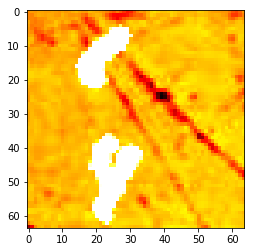

In [6]:
plt.imshow(x[0], cmap='hot', interpolation='nearest')

#### Filter only for black pixels

In [7]:
BLACK_THRES = 255.0
binX = np.floor_divide(x[0], BLACK_THRES)
binCoords = np.nonzero(binX)

In [8]:
binCoords = zip(*binCoords)

In [14]:
PIX_DISTANCE = 4
def groupPoints(binCoords):
    groups = []
    for pt in binCoords:
        distances = np.array([
            np.absolute(np.subtract(grp, pt)).sum(axis=1).min()
            for grp in groups
        ])
        withInPixDist = np.where(distances < PIX_DISTANCE)[0]
        if(len(withInPixDist)==0):
            # no groups are within pixel distance
            groups.append([pt])
        else:
            groups[np.argmin(distances)].append(pt)
            # handle grouping groups
            if len(withInPixDist) > 1:
                # current point joins 2 groups
                groups[withInPixDist[0]] = groups[withInPixDist[0]] + groups[withInPixDist[1]]
    return groups

In [20]:
grps[0]

[(5, 25),
 (5, 26),
 (5, 27),
 (5, 28),
 (5, 29),
 (6, 24),
 (6, 25),
 (6, 26),
 (6, 27),
 (6, 28),
 (6, 29),
 (7, 24),
 (7, 25),
 (7, 26),
 (7, 27),
 (7, 28),
 (7, 29),
 (8, 21),
 (8, 22),
 (8, 23),
 (8, 21),
 (8, 22),
 (8, 24),
 (8, 21),
 (8, 22),
 (8, 25),
 (8, 21),
 (8, 22),
 (8, 26),
 (8, 27),
 (8, 28),
 (8, 29),
 (9, 19),
 (8, 21),
 (8, 22),
 (9, 20),
 (8, 21),
 (8, 22),
 (9, 21),
 (8, 21),
 (8, 22),
 (9, 22),
 (8, 21),
 (8, 22),
 (9, 23),
 (8, 21),
 (8, 22),
 (9, 24),
 (8, 21),
 (8, 22),
 (9, 25),
 (9, 26),
 (9, 27),
 (9, 28),
 (9, 29),
 (10, 19),
 (10, 20),
 (8, 21),
 (8, 22),
 (10, 21),
 (8, 21),
 (8, 22),
 (10, 22),
 (8, 21),
 (8, 22),
 (10, 23),
 (8, 21),
 (8, 22),
 (10, 24),
 (10, 25),
 (10, 26),
 (10, 27),
 (10, 28),
 (11, 18),
 (11, 19),
 (11, 20),
 (11, 21),
 (8, 21),
 (8, 22),
 (11, 22),
 (8, 21),
 (8, 22),
 (11, 23),
 (11, 24),
 (11, 25),
 (11, 26),
 (11, 27),
 (11, 28),
 (12, 18),
 (12, 19),
 (12, 20),
 (12, 21),
 (12, 22),
 (12, 23),
 (12, 24),
 (12, 25),
 (12, 26),


In [22]:
print np.min(grps[0], axis=0)
print np.max(grps[0], axis=0)

[ 5 14]
[16 29]


In [56]:
# returns coordinates of min, max points of given group.
def getBounds(group):
    mins = np.min(group, axis=0)
    maxs = np.max(group, axis=0)
    return {
        'x' : (mins[1], maxs[1], maxs[1] - mins[1]),
        'y' : (mins[0], maxs[0], maxs[0] - mins[0])
    }

In [45]:
np.max(grps[0], axis=0)

array([22, 29])

In [52]:
grps = groupPoints(binCoords)

In [47]:
len(grps)

3

In [57]:
getBounds(grps[0])

{'x': (14, 29, 15), 'y': (5, 22, 17)}

In [58]:
bounds = [getBounds(group) for group in grps]
np.argmax([max(bound['x'][2], bound['y'][2]) for bound in bounds])

2

In [59]:
bounds

[{'x': (14, 29, 15), 'y': (5, 22, 17)},
 {'x': (21, 22, 1), 'y': (8, 8, 0)},
 {'x': (18, 33, 15), 'y': (37, 62, 25)}]

In [116]:
BLACK_THRES = 255.0

def preprocessImage(img):
    
    # Filter just dark colors
    binX = np.floor_divide(img, BLACK_THRES)
    
    # group and get bounds of hand written digits
    binCoords = zip(*np.nonzero(binX))
    groups = groupPoints(binCoords)
    bounds = [getBounds(group) for group in groups]
    
    # return largest image
    indLargetImg = np.argmax([max(bound['x'][2], bound['y'][2]) for bound in bounds])
    sliceBounds = bounds[indLargetImg]
    imgSlice = img[sliceBounds['y'][0]:sliceBounds['y'][1], sliceBounds['x'][0]:sliceBounds['x'][1]]
    return np.floor_divide(imgSlice, BLACK_THRES)

In [117]:
tmp = preprocessImage(x[0])

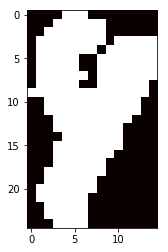

In [118]:
plt.imshow(tmp, cmap='hot', interpolation='nearest')

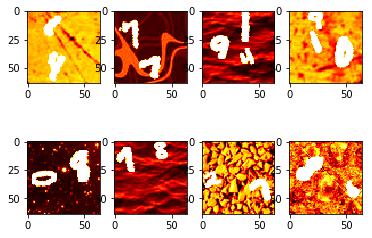

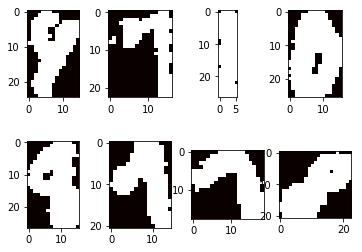

In [119]:
f, axarr = plt.subplots(2, 4)
f.subplots_adjust(hspace=0.5)
axarr[0][0].imshow(x[0], cmap='hot', interpolation='nearest')
axarr[0][1].imshow(x[1], cmap='hot', interpolation='nearest')
axarr[0][2].imshow(x[2], cmap='hot', interpolation='nearest')
axarr[0][3].imshow(x[3], cmap='hot', interpolation='nearest')
axarr[1][0].imshow(x[4], cmap='hot', interpolation='nearest')
axarr[1][1].imshow(x[5], cmap='hot', interpolation='nearest')
axarr[1][2].imshow(x[6], cmap='hot', interpolation='nearest')
axarr[1][3].imshow(x[7], cmap='hot', interpolation='nearest')

f, axarr = plt.subplots(2, 4)
f.subplots_adjust(hspace=0.5)
axarr[0][0].imshow(preprocessImage(x[0]), cmap='hot', interpolation='nearest')
axarr[0][1].imshow(preprocessImage(x[1]), cmap='hot', interpolation='nearest')
axarr[0][2].imshow(preprocessImage(x[2]), cmap='hot', interpolation='nearest')
axarr[0][3].imshow(preprocessImage(x[3]), cmap='hot', interpolation='nearest')
axarr[1][0].imshow(preprocessImage(x[4]), cmap='hot', interpolation='nearest')
axarr[1][1].imshow(preprocessImage(x[5]), cmap='hot', interpolation='nearest')
axarr[1][2].imshow(preprocessImage(x[6]), cmap='hot', interpolation='nearest')
axarr[1][3].imshow(preprocessImage(x[7]), cmap='hot', interpolation='nearest')

#### Reshape identified numbers into standard shape

In [121]:
imgSlice = preprocessImage(x[0])

In [137]:
sliceSize = (len(imgSlice), len(imgSlice[0]))
targetSize = (30,30)
bottomBnd = (targetSize[0]//2-sliceSize[0]//2, targetSize[1]/2-sliceSize[1]//2)
topBnd = (targetSize[0]//2+sliceSize[0]//2+1, targetSize[1]/2+sliceSize[1]//2+1)
print bottomBnd, topBnd
img = np.zeros(targetSize)
img[bottomBnd[0]:topBnd[0], bottomBnd[1]:topBnd[1]] = imgSlice

(3, 8) (28, 23)


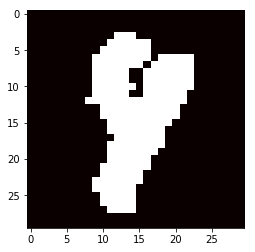

In [138]:
plt.imshow(img, cmap='hot', interpolation='nearest')

In [ ]:
def 

#### Implement the Neural Network

#### Define Preprocessing to Train NN pipeline